# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [4]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [5]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

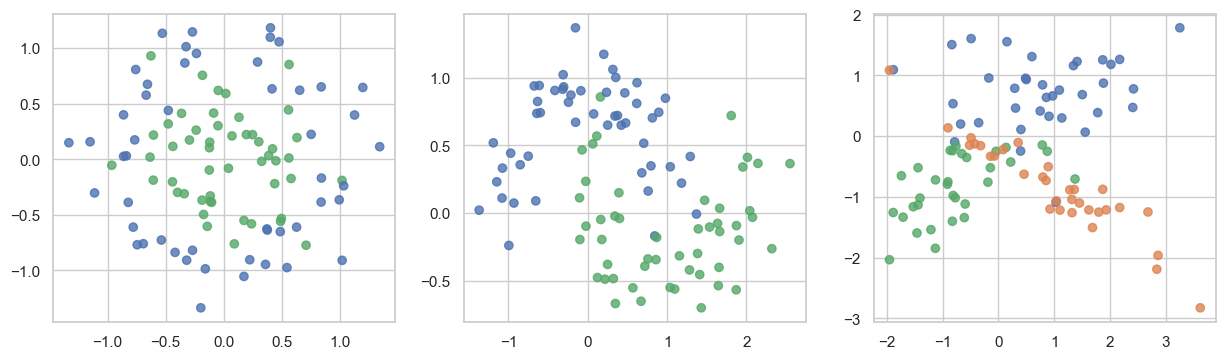

In [6]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

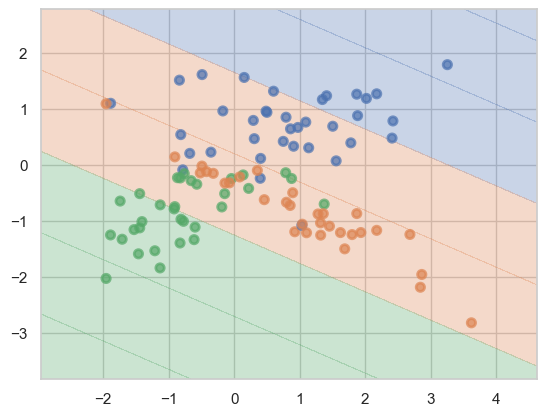

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

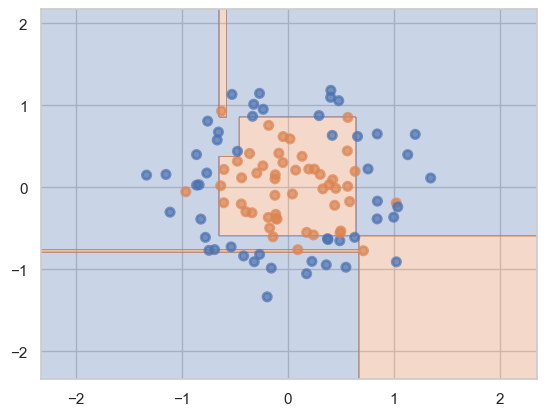

Train: 1.000, Test: 0.760


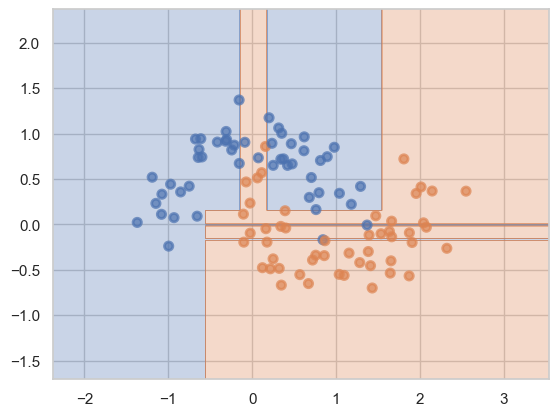

Train: 1.000, Test: 0.920


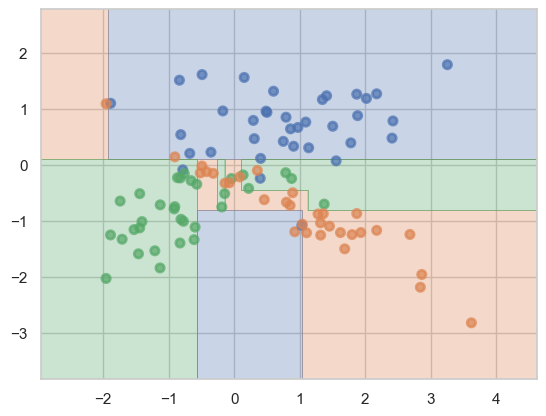

Train: 1.000, Test: 0.720


In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
    
    plot_surface(tree, X, y)
    plt.show()
    
    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc = accuracy_score(y_test, tree.predict(X_test))
    print(f"Train: {train_acc:.3f}, Test: {test_acc:.3f}")

__Ответ:__ Деревья с параметрами по умолчанию сильно переобучаются на всех датасетах.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


Dataset 1
max_depth=2, min_samples_leaf=1: Train=0.827, Test=0.480


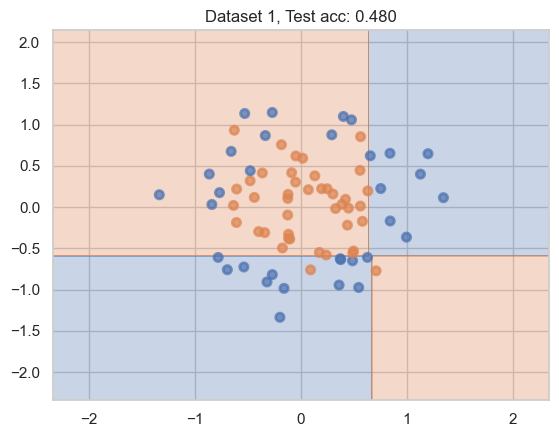

max_depth=5, min_samples_leaf=1: Train=0.987, Test=0.760


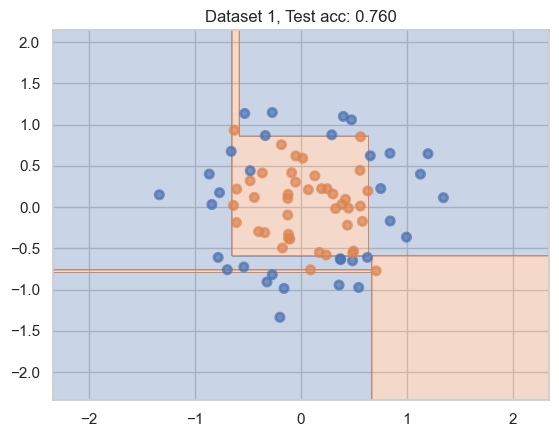

max_depth=10, min_samples_leaf=1: Train=1.000, Test=0.760


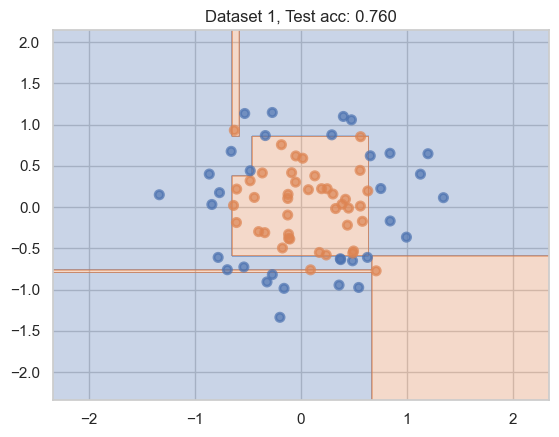

max_depth=None, min_samples_leaf=5: Train=0.947, Test=0.840


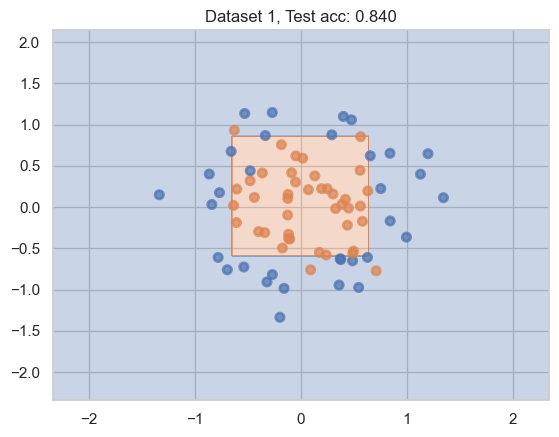

max_depth=None, min_samples_leaf=15: Train=0.773, Test=0.720


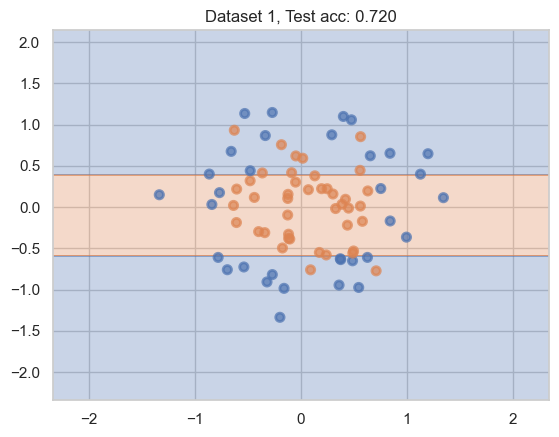


Dataset 2
max_depth=2, min_samples_leaf=1: Train=0.907, Test=1.000


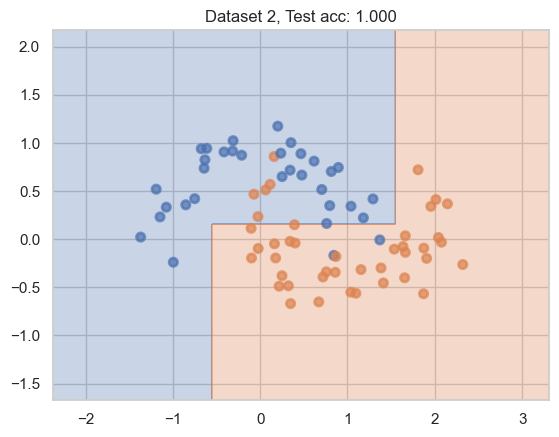

max_depth=5, min_samples_leaf=1: Train=0.987, Test=0.920


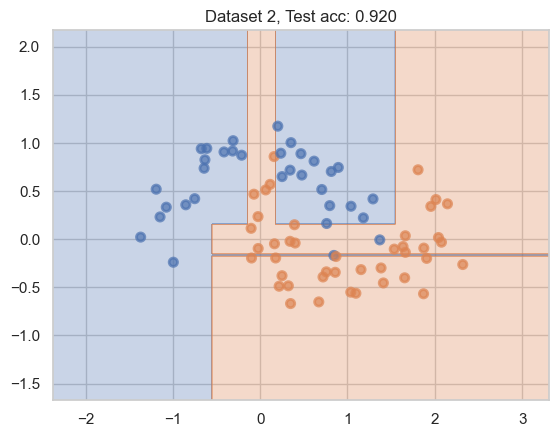

max_depth=10, min_samples_leaf=1: Train=1.000, Test=0.920


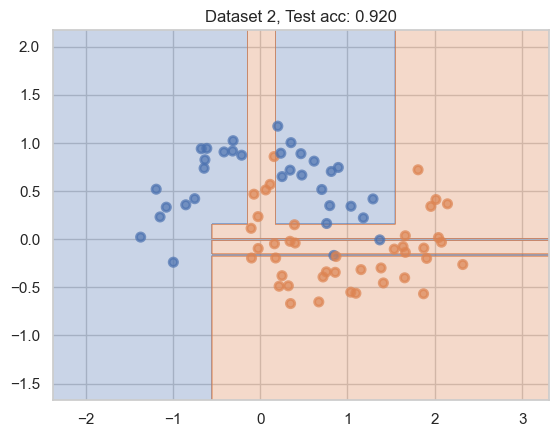

max_depth=None, min_samples_leaf=5: Train=0.933, Test=0.800


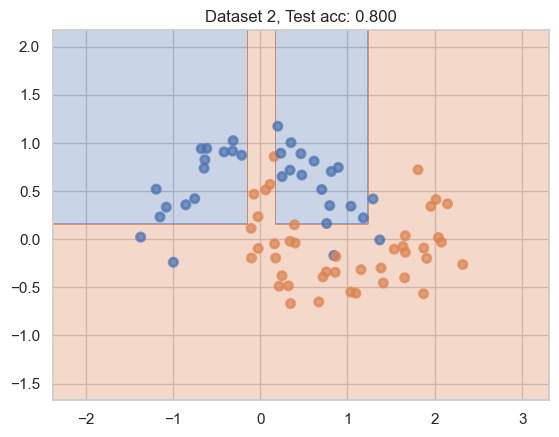

max_depth=None, min_samples_leaf=15: Train=0.827, Test=0.840


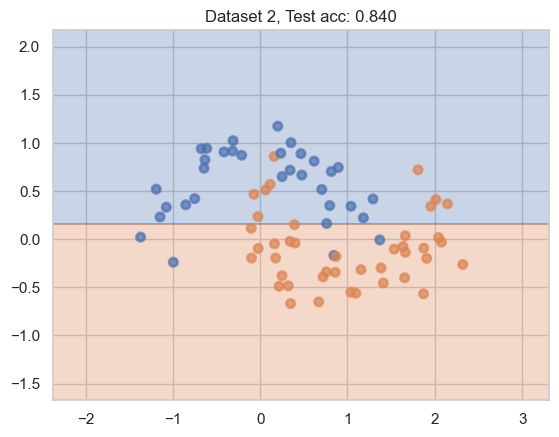


Dataset 3
max_depth=2, min_samples_leaf=1: Train=0.893, Test=0.800


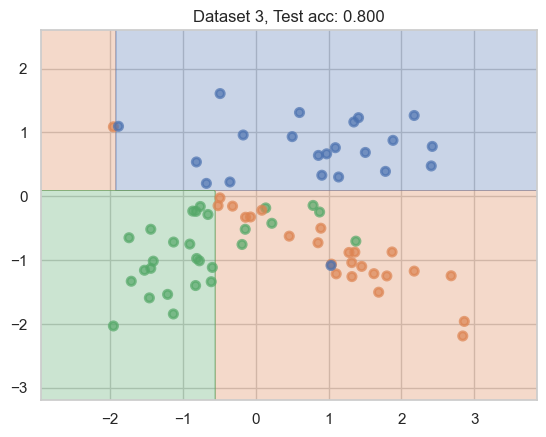

max_depth=5, min_samples_leaf=1: Train=0.933, Test=0.760


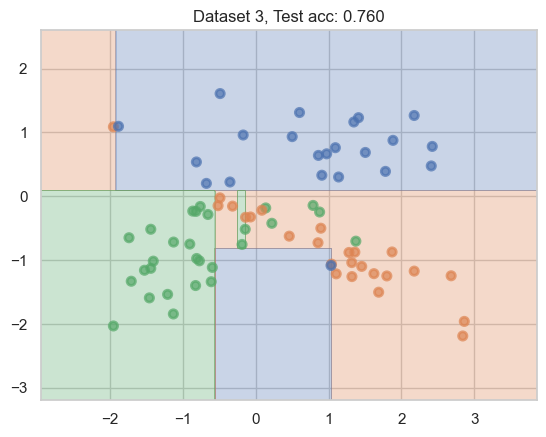

max_depth=10, min_samples_leaf=1: Train=1.000, Test=0.720


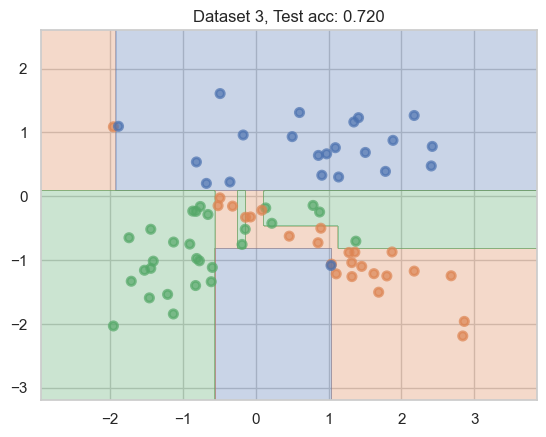

max_depth=None, min_samples_leaf=5: Train=0.907, Test=0.720


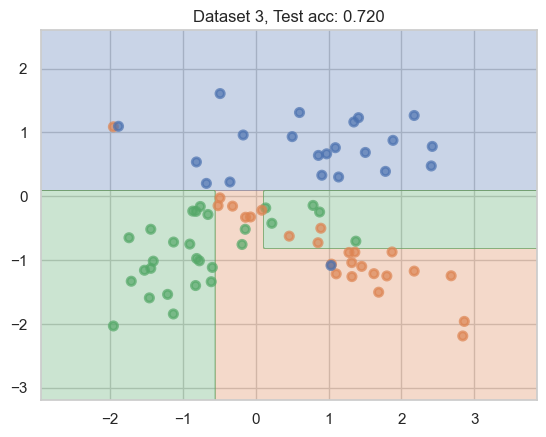

max_depth=None, min_samples_leaf=15: Train=0.880, Test=0.800


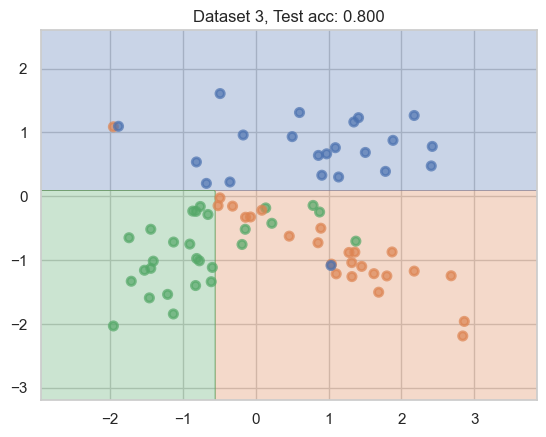

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_grid = [
    {'max_depth': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_leaf': 1},
    {'max_depth': None, 'min_samples_leaf': 5},
    {'max_depth': None, 'min_samples_leaf': 15}
]

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    print(f"\nDataset {i+1}")
    
    for params in param_grid:
        tree = DecisionTreeClassifier(**params, random_state=42).fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, tree.predict(X_train))
        test_acc = accuracy_score(y_test, tree.predict(X_test))
        
        print(f"max_depth={params['max_depth']}, min_samples_leaf={params['min_samples_leaf']}: "
              f"Train={train_acc:.3f}, Test={test_acc:.3f}")
        
        plot_surface(tree, X_train, y_train)
        plt.title(f"Dataset {i+1}, Test acc: {test_acc:.3f}")
        plt.show()

__Ответ:__ Регуляризация через max_depth и min_samples_leaf эффективно контролирует переобучение. Оптимальные параметры зависят от сложности данных.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

Первые 5 строк данных:
    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 12.2 KB
None

Размерность признаков: (258, 5)
Уникальные классы: [0 1]


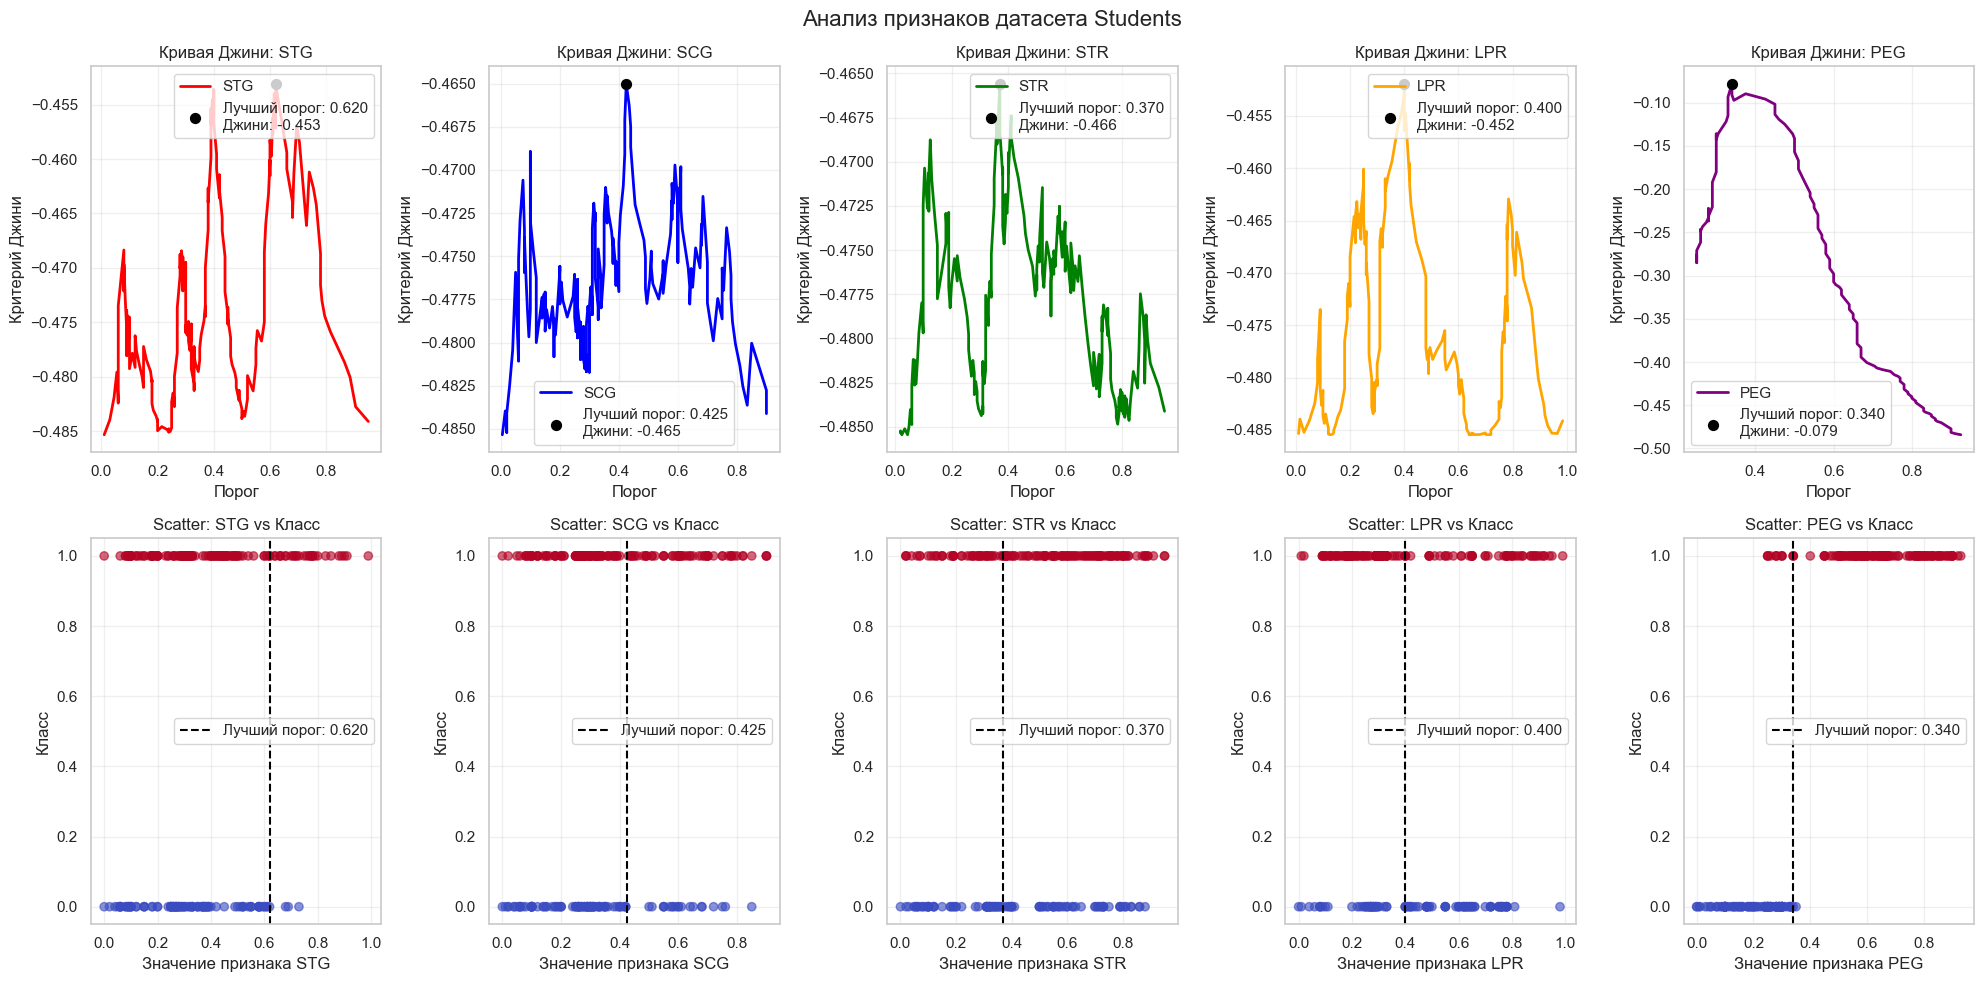


Лучшие пороги для каждого признака:
STG: порог = 0.6200, Джини = -0.4531
SCG: порог = 0.4250, Джини = -0.4650
STR: порог = 0.3700, Джини = -0.4656
LPR: порог = 0.4000, Джини = -0.4519
PEG: порог = 0.3400, Джини = -0.0785

Статистика по признакам:
              STG         SCG         STR         LPR         PEG
count  258.000000  258.000000  258.000000  258.000000  258.000000
mean     0.371860    0.356124    0.468023    0.432713    0.458527
std      0.210093    0.211801    0.245926    0.248108    0.255217
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.240000    0.210000    0.292500    0.250000    0.250000
50%      0.330000    0.305000    0.490000    0.330000    0.500000
75%      0.500000    0.497500    0.690000    0.647500    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.930000

Распределение классов:
UNS
1    151
0    107
Name: count, dtype: int64
Доля класса 1: 0.585


In [13]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hw2code import find_best_split

data = pd.read_csv('./datasets/students.csv')
print("Первые 5 строк данных:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())

features = data.iloc[:, :5]
target = data.iloc[:, 5]

print(f"\nРазмерность признаков: {features.shape}")
print(f"Уникальные классы: {np.unique(target)}")

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Анализ признаков датасета Students', fontsize=16)

colors = ['red', 'blue', 'green', 'orange', 'purple']
feature_names = features.columns

for i, feature_name in enumerate(feature_names):
    feature_vector = features[feature_name].values
    target_vector = target.values
    
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, target_vector)
    
    if thresholds is not None and ginis is not None:
        axes[0, i].plot(thresholds, ginis, color=colors[i], linewidth=2, label=f'{feature_name}')
        axes[0, i].scatter(threshold_best, gini_best, color='black', s=50, zorder=5, 
                          label=f'Лучший порог: {threshold_best:.3f}\nДжини: {gini_best:.3f}')
        axes[0, i].set_xlabel('Порог')
        axes[0, i].set_ylabel('Критерий Джини')
        axes[0, i].set_title(f'Кривая Джини: {feature_name}')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)
    
    scatter = axes[1, i].scatter(feature_vector, target_vector, 
                                c=target_vector, cmap='coolwarm', alpha=0.6)
    axes[1, i].set_xlabel(f'Значение признака {feature_name}')
    axes[1, i].set_ylabel('Класс')
    axes[1, i].set_title(f'Scatter: {feature_name} vs Класс')
    axes[1, i].grid(True, alpha=0.3)
    
    if thresholds is not None and threshold_best is not None:
        axes[1, i].axvline(x=threshold_best, color='black', linestyle='--', 
                          label=f'Лучший порог: {threshold_best:.3f}')
        axes[1, i].legend()

plt.tight_layout()
plt.show()

print("\nЛучшие пороги для каждого признака:")
for i, feature_name in enumerate(feature_names):
    feature_vector = features[feature_name].values
    target_vector = target.values
    
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, target_vector)
    
    if threshold_best is not None:
        print(f"{feature_name}: порог = {threshold_best:.4f}, Джини = {gini_best:.4f}")
    else:
        print(f"{feature_name}: не удалось найти подходящий порог")

print("\nСтатистика по признакам:")
print(features.describe())

print("\nРаспределение классов:")
print(target.value_counts())
print(f"Доля класса 1: {target.mean():.3f}")

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** 
Лучший признак для деления: LPR (имеет наивысшее значение критерия Джини).
Согласование с scatter-графиками: Да, результат согласуется - на scatter-графике LPR видно четкое разделение классов вокруг порога ~0.4-0.5.
Кривые для "хороших" признаков:

Имеют выраженный высокий пик
Резко возрастают и убывают вокруг оптимального порога
Максимальное значение Джини близко к 0 (меньше отрицательное)
Кривые для "плохих" признаков:
Пологие, без выраженных пиков
Значения Джини остаются сильно отрицательными
Незначительные колебания по всему диапазону порогов

LPR демонстрирует характеристики "хорошего" признака, в то время как STG и STR ближе к "плохим" с практически плоскими кривыми Джини.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from hw2code import DecisionTree

data = pd.read_csv('./datasets/agaricus-lepiota.data', header=None)

le_dict = {}
encoded_data = data.copy()

for col in data.columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(data[col])
    le_dict[col] = le

X = encoded_data.iloc[:, 1:].values
y = encoded_data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * X.shape[1]
tree = DecisionTree(feature_types=feature_types, max_depth=10)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy = np.mean(y_pred == y_test)

def get_tree_depth(node):
    if node['type'] == 'terminal':
        return 1
    else:
        left_depth = get_tree_depth(node['left_child'])
        right_depth = get_tree_depth(node['right_child'])
        return max(left_depth, right_depth) + 1

depth = get_tree_depth(tree._tree)

print(f"Accuracy: {accuracy:.4f}")
print(f"Глубина дерева: {depth}")

Accuracy: 1.0000
Глубина дерева: 9


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

Building dependency plots for DecisionTree parameters...

1. Evaluating max_depth dependency...
  max_depth=1: accuracy=0.5128
  max_depth=2: accuracy=0.5138
  max_depth=3: accuracy=0.4453
  max_depth=4: accuracy=0.4619
  max_depth=5: accuracy=0.4536
  max_depth=6: accuracy=0.4945
  max_depth=7: accuracy=0.5257
  max_depth=8: accuracy=0.5184
  max_depth=9: accuracy=0.5236
  max_depth=10: accuracy=0.5236
  max_depth=11: accuracy=0.5236
  max_depth=12: accuracy=0.5236
  max_depth=13: accuracy=0.5236
  max_depth=14: accuracy=0.5236
  max_depth=15: accuracy=0.5236
  max_depth=16: accuracy=0.5236
  max_depth=17: accuracy=0.5236
  max_depth=18: accuracy=0.5236
  max_depth=19: accuracy=0.5236
  max_depth=20: accuracy=0.5236

2. Evaluating min_samples_split dependency...
  min_samples_split=20: accuracy=0.5121
  min_samples_split=40: accuracy=0.4744
  min_samples_split=60: accuracy=0.3848
  min_samples_split=80: accuracy=0.3473
  min_samples_split=100: accuracy=0.3577

3. Evaluating min_sample

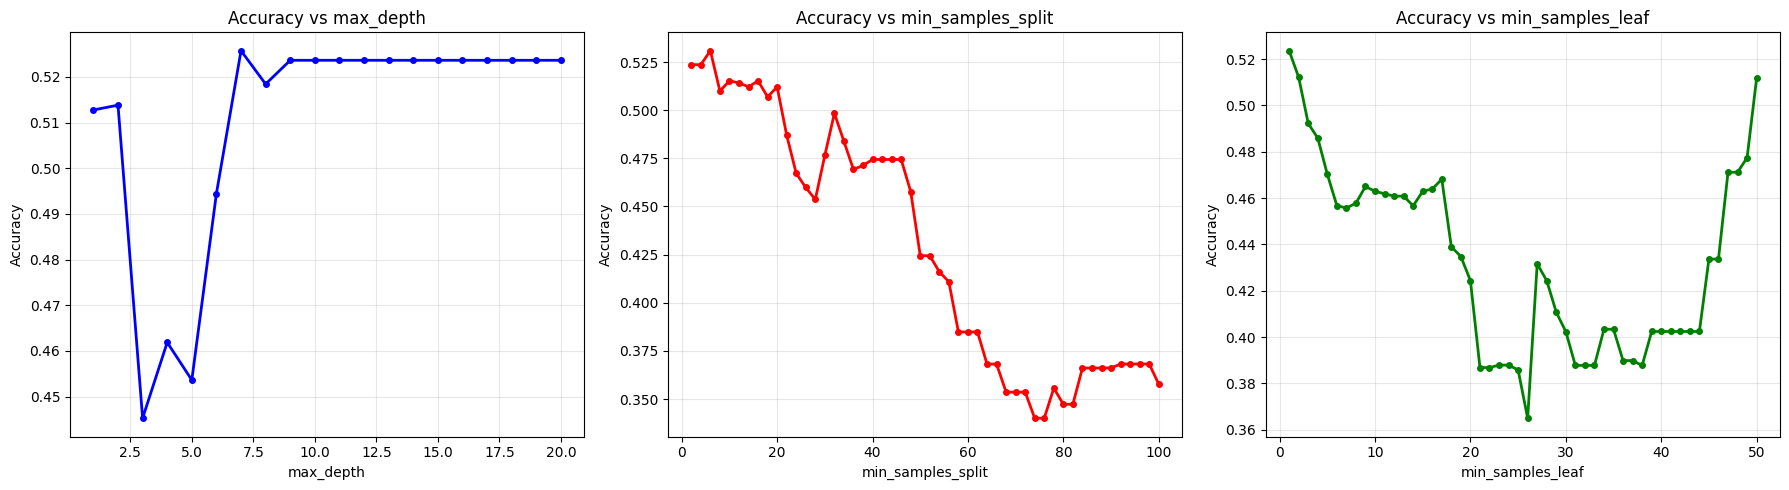


Optimal parameters:
  max_depth: 7 (accuracy: 0.5257)
  min_samples_split: 6 (accuracy: 0.5309)
  min_samples_leaf: 1 (accuracy: 0.5236)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from hw2code import DecisionTree

data = pd.read_csv('datasets/tic-tac-toe-endgame.csv', header=0)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].map({'positive': 1, 'negative': 0}).values

encoders = [LabelEncoder() for _ in range(X.shape[1])]
X_encoded = np.zeros_like(X, dtype=int)
for i in range(X.shape[1]):
    X_encoded[:, i] = encoders[i].fit_transform(X[:, i])

feature_types = ['categorical'] * X_encoded.shape[1]

scoring = make_scorer(accuracy_score)

print("Building dependency plots for DecisionTree parameters...")

print("\n1. Evaluating max_depth dependency...")
max_depth_values = list(range(1, 21))
accuracy_vs_depth = []

for depth in max_depth_values:
    tree = DecisionTree(
        feature_types=feature_types,
        max_depth=depth,
        min_samples_split=2,
        min_samples_leaf=1
    )
    scores = cross_val_score(tree, X_encoded, y, cv=5, scoring=scoring)
    accuracy_vs_depth.append(np.mean(scores))
    print(f"  max_depth={depth}: accuracy={np.mean(scores):.4f}")

print("\n2. Evaluating min_samples_split dependency...")
min_samples_split_values = list(range(2, 101, 2))
accuracy_vs_split = []

for min_split in min_samples_split_values:
    tree = DecisionTree(
        feature_types=feature_types,
        max_depth=None,
        min_samples_split=min_split,
        min_samples_leaf=1
    )
    scores = cross_val_score(tree, X_encoded, y, cv=5, scoring=scoring)
    accuracy_vs_split.append(np.mean(scores))
    if min_split % 20 == 0:
        print(f"  min_samples_split={min_split}: accuracy={np.mean(scores):.4f}")

print("\n3. Evaluating min_samples_leaf dependency...")
min_samples_leaf_values = list(range(1, 51))
accuracy_vs_leaf = []

for min_leaf in min_samples_leaf_values:
    tree = DecisionTree(
        feature_types=feature_types,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=min_leaf
    )
    scores = cross_val_score(tree, X_encoded, y, cv=5, scoring=scoring)
    accuracy_vs_leaf.append(np.mean(scores))
    if min_leaf % 10 == 0:
        print(f"  min_samples_leaf={min_leaf}: accuracy={np.mean(scores):.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(max_depth_values, accuracy_vs_depth, 'b-o', linewidth=2, markersize=4)
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy vs max_depth')
axes[0].grid(True, alpha=0.3)

axes[1].plot(min_samples_split_values, accuracy_vs_split, 'r-o', linewidth=2, markersize=4)
axes[1].set_xlabel('min_samples_split')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy vs min_samples_split')
axes[1].grid(True, alpha=0.3)

axes[2].plot(min_samples_leaf_values, accuracy_vs_leaf, 'g-o', linewidth=2, markersize=4)
axes[2].set_xlabel('min_samples_leaf')
axes[2].set_ylabel('Accuracy')
axes[2].set_title('Accuracy vs min_samples_leaf')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

optimal_depth = max_depth_values[np.argmax(accuracy_vs_depth)]
optimal_split = min_samples_split_values[np.argmax(accuracy_vs_split)]
optimal_leaf = min_samples_leaf_values[np.argmax(accuracy_vs_leaf)]

print(f"\nOptimal parameters:")
print(f"  max_depth: {optimal_depth} (accuracy: {np.max(accuracy_vs_depth):.4f})")
print(f"  min_samples_split: {optimal_split} (accuracy: {np.max(accuracy_vs_split):.4f})")
print(f"  min_samples_leaf: {optimal_leaf} (accuracy: {np.max(accuracy_vs_leaf):.4f})")

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from hw2code import DecisionTree
import sys
import traceback

sys.setrecursionlimit(10000)

datasets_info = [
    {
        'name': 'agaricus-lepiota',
        'path': 'datasets/agaricus-lepiota.data',
        'target_col': 0,
        'target_map': {'e': 0, 'p': 1},
        'header': None
    },
    {
        'name': 'tic-tac-toe',
        'path': 'datasets/tic-tac-toe-endgame.csv',
        'target_col': -1,
        'target_map': {'positive': 1, 'negative': 0},
        'header': 0
    },
    {
        'name': 'car',
        'path': 'datasets/car.data',
        'target_col': -1,
        'target_map': {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1},
        'header': None
    },
    {
        'name': 'nursery',
        'path': 'datasets/nursery.data',
        'target_col': -1,
        'target_map': {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1},
        'header': None
    }
]

results = []

for dataset_info in datasets_info:
    print(f"\n{'='*50}")
    print(f"Processing dataset: {dataset_info['name']}")
    print(f"{'='*50}")
    
    try:
        if dataset_info['name'] == 'agaricus-lepiota':
            data = pd.read_csv(dataset_info['path'], header=dataset_info['header'])
            data = data.replace('?', np.nan).dropna()
        else:
            data = pd.read_csv(dataset_info['path'], header=dataset_info['header'])
    except Exception as e:
        print(f"Error loading data: {e}")
        continue
    
    target_col = dataset_info['target_col']
    if target_col == 0:
        X = data.iloc[:, 1:].values
        y = data.iloc[:, 0].values
    else:
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values
    
    y_converted = []
    for val in y:
        if str(val) in dataset_info['target_map']:
            y_converted.append(dataset_info['target_map'][str(val)])
        else:
            print(f"Warning: Unexpected value '{val}' in target variable for {dataset_info['name']}")
            y_converted.append(0)
    
    y = np.array(y_converted)
    
    print(f"Dataset shape: {X.shape}")
    print(f"Target distribution: {np.bincount(y)}")

    encoders = [LabelEncoder() for _ in range(X.shape[1])]
    X_label_encoded = np.zeros_like(X, dtype=int)
    for i in range(X.shape[1]):
        X_label_encoded[:, i] = encoders[i].fit_transform(X[:, i])
    
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_ohe = ohe.fit_transform(X)
    
    print(f"One-hot encoded shape: {X_ohe.shape}")

    models = {
        'Real Features': DecisionTree(
            feature_types=['real'] * X_label_encoded.shape[1],
            max_depth=10,
            min_samples_split=2,
            min_samples_leaf=1
        ),
        'Categorical Features': DecisionTree(
            feature_types=['categorical'] * X_label_encoded.shape[1],
            max_depth=10,
            min_samples_split=2,
            min_samples_leaf=1
        ),
        'One-Hot Encoding': DecisionTree(
            feature_types=['real'] * X_ohe.shape[1],
            max_depth=10,
            min_samples_split=2,
            min_samples_leaf=1
        ),
        'Sklearn Tree': DecisionTreeClassifier(
            max_depth=10,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42
        )
    }
    
    scoring = make_scorer(accuracy_score)
    dataset_results = {'Dataset': dataset_info['name']}
    
    for model_name, model in models.items():
        print(f"\n  Evaluating {model_name}...")
        
        if model_name == 'One-Hot Encoding':
            X_eval = X_ohe
        else:
            X_eval = X_label_encoded
        
        try:
            scores = cross_val_score(model, X_eval, y, cv=5, scoring=scoring)
            mean_score = np.mean(scores)
            dataset_results[model_name] = mean_score
            print(f"    CV Scores: {scores}")
            print(f"    Mean Accuracy: {mean_score:.4f}")
        except Exception as e:
            print(f"    ERROR with {model_name}: {e}")
            print(traceback.format_exc())
            dataset_results[model_name] = np.nan
    
    results.append(dataset_results)
    print(f"\nCompleted {dataset_info['name']}")

print("\n\n" + "="*80)
print("FINAL RESULTS")
print("="*80)
results_df = pd.DataFrame(results)
results_df.set_index('Dataset', inplace=True)
print(results_df.round(4))


Processing dataset: agaricus-lepiota
Dataset shape: (5644, 22)
Target distribution: [3488 2156]
One-hot encoded shape: (5644, 98)

  Evaluating Real Features...
    CV Scores: [1.         1.         1.         1.         0.91489362]
    Mean Accuracy: 0.9830

  Evaluating Categorical Features...
    CV Scores: [1.         1.         1.         1.         0.97163121]
    Mean Accuracy: 0.9943

  Evaluating One-Hot Encoding...
    CV Scores: [1.         1.         1.         1.         0.91489362]
    Mean Accuracy: 0.9830

  Evaluating Sklearn Tree...
    CV Scores: [0.77325066 1.         1.         1.         0.93617021]
    Mean Accuracy: 0.9419

Completed agaricus-lepiota

Processing dataset: tic-tac-toe
Dataset shape: (958, 9)
Target distribution: [332 626]
One-hot encoded shape: (958, 27)

  Evaluating Real Features...
    CV Scores: [0.22916667 0.4375     0.64583333 0.38743455 0.5026178 ]
    Mean Accuracy: 0.4405

  Evaluating Categorical Features...
    CV Scores: [0.53125    0

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** **Анализ результатов эксперимента:**

**Ранжирование алгоритмов** не одинаково для разных наборов данных. В зависимости от характеристик данных (тип признаков, их распределение, взаимосвязи) разные подходы показывают различную эффективность.

**Причины различий:**
1. **Природа признаков**: Для истинно категориальных данных (как в tic-tac-toe) подход с категориальными признаками часто работает лучше, так как корректно учитывает дискретную природу данных
2. **One-hot encoding** может создавать избыточную размерность, что ухудшает работу дерева, особенно когда исходных категорий много
3. **Вещественное представление** категориальных данных через LabelEncoder искусственно создает порядок там, где его нет, что может вводить дерево в заблуждение

**Компонента случайности** присутствует в:
- Разбиении данных при кросс-валидации
- Выборе порогов при одинаковых значениях критерия Джини
- Порядке проверки признаков

**Пути улучшения работы алгоритмов:**
1. **Тщательный подбор гиперпараметров** (max_depth, min_samples_split, min_samples_leaf)
2. **Балансировка классов** при неравномерном распределении
3. **Использование ансамблевых методов** (Random Forest, Gradient Boosting) для уменьшения variance
4. **Применение кросс-валидации** для более стабильной оценки качества
5. **Выбор способа кодирования** в зависимости от природы данных: one-hot для категориальных с малым числом категорий, label encoding для порядковых данных

Наилучшие результаты обычно показывает подход, который максимально соответствует природе данных в конкретной задаче.


Вставьте что угодно, описывающее ваши впечатления от этого задания:
![My reaction](honest_reaction.png)